In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
to_train = pd.read_csv("train_set.csv")

In [3]:
to_train

,label,id_img,path
0,happy,22373,happy/22373.jpg
1,happy,21433,happy/21433.jpg
2,happy,12418,happy/12418.jpg
3,happy,21278,happy/21278.jpg
4,happy,8081,happy/08081.jpg
...,...,...,...
6171,sadness,11346,sadness/11346.jpg
6172,sadness,4441,sadness/04441.jpg
6173,sadness,15236,sadness/15236.jpg
6174,sadness,27361,sadness/27361.jpg


In [4]:
# Convertimos todas las imagenes en un array:
X_train = []
for elem in to_train.path:
    path = "totrain/totrain/" + elem
    X_train.append((cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY).reshape(48,48,1)))

X_train = np.array(X_train)
#print(X_train)
print("####################")
print(X_train.shape)

####################
(6176, 48, 48, 1)


In [5]:
# si quieres convertir una serie a lista puedes hacerlo con esta línea de código :) 
lista_label =  to_train.label.tolist()

Para mezclar las imágenes de feliz y triste:

https://stackoverflow.com/questions/23289547/shuffle-two-list-at-once-with-same-order

```python
a = ['a', 'b', 'c']
b = [1, 2, 3]

c = list(zip(a, b))

random.shuffle(c)

a, b = zip(*c)

print a
print b

[OUTPUT]
['a', 'c', 'b']
[1, 3, 2]

```

In [6]:
c = list(zip(X_train.tolist(), lista_label))
random.shuffle(c)
X_train, lista_label = zip(*c)

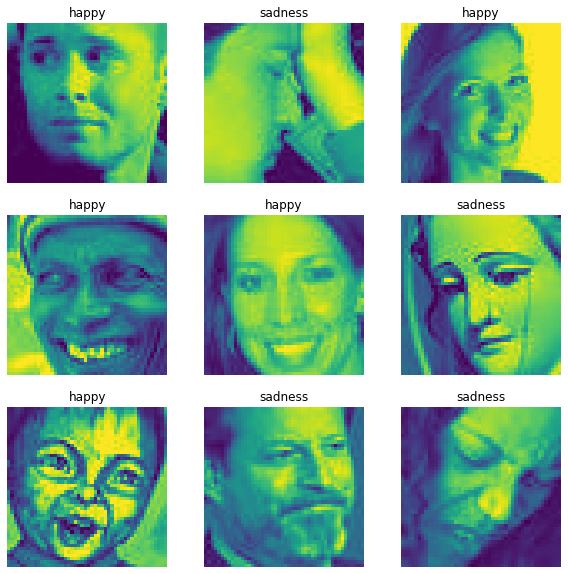

In [7]:
plt.figure(figsize=(10, 10))
for i, foto in enumerate(X_train[:9]):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.array(foto).reshape(48,48))
    plt.title(lista_label[i])
    plt.axis("off")

In [8]:
y_train = np.asarray(lista_label)
X_train = np.asarray(X_train)
y_train

array(['happy', 'sadness', 'happy', ..., 'sadness', 'happy', 'happy'],
      dtype='<U7')

In [9]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train[10:]

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [10]:
X_train.shape, y_train.shape

((6176, 48, 48, 1), (6176,))

In [11]:
tf.config.run_functions_eagerly(True)

INPUT_SHAPE = (48,48,1)

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

# añadido por Gabriel
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(rate=0.5))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=16, activation="relu"))
model.add(keras.layers.Dense(units=32, activation="relu"))

model.add(keras.layers.Dense(units=2, activation="softmax"))
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

In [12]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.20, verbose=1)

Epoch 1/20


c:\users\clara\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


155/155 [==============================] - 16s 101ms/step - loss: 0.8588 - accuracy: 0.5190 - val_loss: 0.7055 - val_accuracy: 0.4717
Epoch 2/20
155/155 [==============================] - 23s 150ms/step - loss: 0.6965 - accuracy: 0.5190 - val_loss: 0.6808 - val_accuracy: 0.5510
Epoch 3/20
155/155 [==============================] - 22s 143ms/step - loss: 0.6742 - accuracy: 0.5715 - val_loss: 0.6192 - val_accuracy: 0.6392
Epoch 4/20
155/155 [==============================] - 18s 118ms/step - loss: 0.6303 - accuracy: 0.6441 - val_loss: 0.5689 - val_accuracy: 0.7201
Epoch 5/20
155/155 [==============================] - 17s 110ms/step - loss: 0.5990 - accuracy: 0.6814 - val_loss: 0.5358 - val_accuracy: 0.7371
Epoch 6/20
155/155 [==============================] - 18s 114ms/step - loss: 0.5572 - accuracy: 0.7172 - val_loss: 0.5116 - val_accuracy: 0.7492
Epoch 7/20
155/155 [==============================] - 21s 134ms/step - loss: 0.5104 - accuracy: 0.7462 - val_loss: 0.4687 - val_accuracy: 0.7

In [14]:
# Evaluar Exactitud
test_loss, test_acc = model.evaluate(X_train, y_train, verbose=2)

print('\nTest accuracy:', test_acc)

193/193 - 9s - loss: 0.2672 - accuracy: 0.8897

Test accuracy: 0.8897344470024109


## Aplicamos to_pred & sample submission

In [15]:
to_test = pd.read_csv("test_set.csv")

In [16]:
to_test

,id_img,path
0,18341,to_pred/18341.jpg
1,13176,to_pred/13176.jpg
2,23945,to_pred/23945.jpg
3,15968,to_pred/15968.jpg
4,18382,to_pred/18382.jpg
...,...,...
4112,8966,to_pred/08966.jpg
4113,12111,to_pred/12111.jpg
4114,16629,to_pred/16629.jpg
4115,24322,to_pred/24322.jpg


#### Aplico todos los pasos que he necesitado para X_train

In [48]:
to_pred = []
for elem in to_test.path:
    path = "to_pred/" + elem
    to_pred.append((cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY).reshape(48,48,1)))

to_pred = np.array(to_pred)
print("####################")
print(to_pred.shape)

####################
(4117, 48, 48, 1)


In [24]:
predictions_submit = model.predict(to_pred)
len(predictions_submit)

4117

In [36]:
to_test.head()

,id_img,path
0,18341,to_pred/18341.jpg
1,13176,to_pred/13176.jpg
2,23945,to_pred/23945.jpg
3,15968,to_pred/15968.jpg
4,18382,to_pred/18382.jpg


In [38]:
to_test['solution'] = np.where((pd.DataFrame(predictions_submit)[0] > pd.DataFrame(predictions_submit)[1])
                     , "happy", "sadness")

In [41]:
to_test.head()

,id_img,path,solution
0,18341,to_pred/18341.jpg,happy
1,13176,to_pred/13176.jpg,happy
2,23945,to_pred/23945.jpg,sadness
3,15968,to_pred/15968.jpg,happy
4,18382,to_pred/18382.jpg,happy


In [42]:
submission = to_test[["id_img", "solution"]]

In [43]:
validando = pd.read_csv('ground_truth.csv')

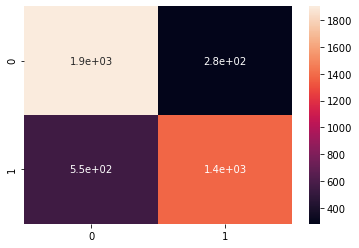

In [46]:
confusion = confusion_matrix(validando['label'], submission['solution'])
sns.heatmap(confusion, annot=True)

In [47]:
confusion

array([[1902,  282],
       [ 554, 1379]], dtype=int64)